In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Tight binding chains
- *Author: Chen Huang*
- *Date: 05 Feb 2024*

## 2D square lattice
These site-localized states $\ket{\vec{R},\alpha}$ are often called Fock states. Since the bound state label does not change in the hopping, we can consider each energy band separately and drop
the $\alpha$ label: $\ket{\vec{R},\alpha}\to\ket{\vec{R}}$. In this basis, we can write the electron state as
$$
	\ket{\psi}=\sum_{\vec{R}}c_{\vec{R}}\ket{\vec{R}}, 
$$
where $c_{\vec{R}}$ is the probability amplitude for finding the electron at site $\vec{R}$. If we only consider the interaction between the nearest-neighbour pairs, the Hamiltonian for the tight binding model is
$$
	\hat{H}=\epsilon_\alpha \sum_{\vec{R}}\ket{\vec{R}}\bra{\vec{R}}-t_\alpha \sum_{\langle\vec{R},\vec{R}'\rangle}\left(\ket{\vec{R}}\bra{\vec{R}'}+\ket{\vec{R}'}\bra{\vec{R}}\right), 
$$
where the sign $\langle\cdots\rangle$ means that we are summing over all nearest-neighbour pairs, $\vec{R}$ and $\vec{R'}$, on the lattice. $\epsilon_\alpha$ is the on-site energy, or the bound-state energy. $t_\alpha$ is the hopping integral. If we apply the tight binding Hamiltonian to the electron state
$$
	\begin{aligned}
		\hat{H}\ket{\psi}=&\epsilon_\alpha \sum_{\vec{R},\vec{S}}c_{\vec{R}}\ket{\vec{S}}\bra{\vec{S}}\ket{\vec{R}}-t_\alpha\sum_{\vec{R},\langle\vec{S},\vec{S}'\rangle}c_{\vec{R}}(\ket{\vec{S}}\bra{\vec{S}'}\ket{\vec{R}}+\ket{\vec{S}'}\bra{\vec{S}}\ket{\vec{R}})\\
		=&\epsilon_\alpha \sum_{\vec{S}}c_{\vec{S}}\ket{\vec{S}}-t_\alpha \sum_{\langle\vec{S},\vec{S}'\rangle}(c_{\vec{S'}}\ket{\vec{S}}+c_{\vec{S}}\ket{\vec{S'}}).
	\end{aligned}
$$
To see what happens at site $\vec{R}$, we take overlap of both sides with $\bra{\vec{R}}$
$$
	\bra{\vec{R}}\hat{H}\ket{\psi}=\epsilon_\alpha c_{\vec{R}}-t_\alpha \sum_{\langle\vec{S},\vec{S}'\rangle}(c_{\vec{S'}}\delta_{\vec{R},\vec{S}}+c_{\vec{S}}\delta_{\vec{R},\vec{S}'})=\epsilon_\alpha c_{\vec{R}}-t_\alpha\sum_{\vec{\delta}} c_{\vec{R}+\vec{\delta}},
$$
where the set of vectors $\vec{\delta}$ contains all the vectors joining $\vec{R}$ to its nearest neighbours. For an eigenstate with energy $E$, we must have $\bra{\vec{R}}\hat{H}\ket{\psi}=E_\alpha\langle\vec{R}|\psi\rangle$, which gives
$$
	\epsilon_\alpha c_{\vec{R}}-t_\alpha\sum_{\vec{\delta}}c_{\vec{R}+\vec{\delta}}=E_\alpha c_{\vec{R}}\quad\text{for all sites }\vec{R},
$$
where $c_{\vec{R}}=\mathrm{e}^{i\vec{k}\cdot\vec{R}}$. So the eigenvectors and eigenevalues can be expressed in terms of $\vec{k}$: 
$$
	\ket{\vec{k},\alpha}=\frac{1}{\sqrt{N}}\sum_{\vec{R}}\mathrm{e}^{i\vec{k}\cdot\vec{R}}\ket{\vec{R},\alpha},\quad E_{\alpha\vec{k}}=\epsilon_\alpha-t_\alpha\sum_{\vec{\delta}}\mathrm{e}^{i\vec{k}\cdot\vec{\delta}}\quad(\vec{k}\in\text{1st Brillouin zone}).
$$
The factor $1/\sqrt{N}$ in $\ket{\vec{k},\alpha}$ is the normalization factor for $N$ sites. For a 2D square lattice model with lattice spacing $a$, the energy spectrum is
$$
	E_{\alpha\vec{k}}=\epsilon_\alpha-2t_\alpha[\cos(k_xa)+\cos(k_ya)].
$$

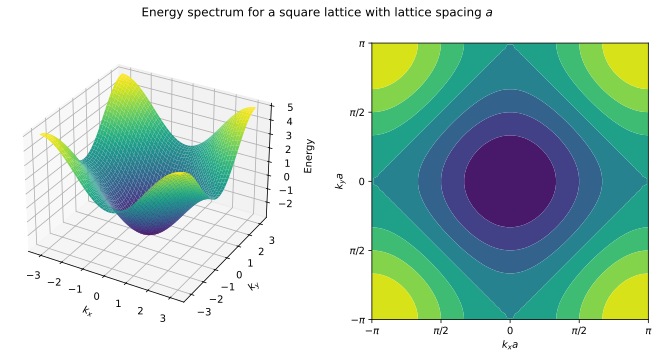

In [2]:
# Parameters
t = 1  # Hopping energy
e = 1  # Chemical potential
a = 1  # Lattice constant
N = 50  # Number of k points in each direction
kx = np.linspace(-np.pi/a, np.pi/a, N)
ky = np.linspace(-np.pi/a, np.pi/a, N)

# Energy spectrum in the reciprocal (k) space
def energy_spectrum(kx, ky):
    return e - 2 * t * (np.cos(kx * a) + np.cos(ky * a)) 

# Calculate energy for each kx, ky pair
energy = np.array([[energy_spectrum(x, y) for x in kx] for y in ky])

# Plot
fig = plt.figure(figsize=(12, 5))

# Energy spectrum in the reciprocal (k) space in 3D
ax1 = fig.add_subplot(121, projection='3d')
KX, KY = np.meshgrid(kx, ky)
ax1.plot_surface(KX, KY, energy, cmap='viridis')

ax1.set_xlabel('$k_x$')
ax1.set_ylabel('$k_y$')
ax1.set_zlabel('Energy')

# Energy spectrum in the reciprocal (k) space 
ax2 = fig.add_subplot(122)
ax2.contourf(KX, KY, energy)
ax2.axis('scaled')
ax2.set_xlabel('$k_xa$')
ax2.set_ylabel('$k_ya$')
ax2.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['$-\pi$','$\pi/2$','0','$\pi/2$','$\pi$' ])
ax2.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['$-\pi$','$\pi/2$','0','$\pi/2$','$\pi$' ])

fig.suptitle('Energy spectrum for a square lattice with lattice spacing $a$')
plt.show()

## Infinite alternating chain
The tight binding chain with alternating hoppings $v$ and $w$. The unit cell labelled by $n$, and there are two sites $A$ and $B$ per unit cell. The on-site electron states are denoted as $\ket{n,A}$ and $\ket{n,B}$. The Hamiltonian is given by
$$
    \hat{H}_\text{alt}=-\sum_n\left[v(\ket{n,A}\bra{n,B}+\ket{n,B}\bra{n,A})+w(\ket{n,B}\bra{n+1,A}+\ket{n+1,A}\bra{n,B})\right].
$$
The eigenstate is given by
$$
	\ket{\psi}=\sum_n(c_{n,A}\ket{n,A}+c_{n,B}\ket{n,B}), 
$$
where $c_{n,A}=c_A\mathrm{e}^{ikna}$ and $c_{n,B}=c_B\mathrm{e}^{ikna}$ due to the Bloch theorem. The Schrödinger equation $\hat{H}_\text{alt}\ket{\psi}=E\ket{\psi}$ gives
$$
	Ec_{n,A}=-wc_{n-1,B}-vc_{n,B},\quad
    Ec_{n,B}=-wc_{n+1,A}-vc_{n,A}, 
$$
which equivalent to
$$
	-\begin{pmatrix}
		0 & v+w\mathrm{e}^{-ika} \\ v+w\mathrm{e}^{ika} & 0
	\end{pmatrix}
	\begin{pmatrix}
		c_A \\ c_B
	\end{pmatrix}=h_k\begin{pmatrix}
		c_A \\ c_B
	\end{pmatrix}=E\begin{pmatrix}
		c_A \\ c_B
	\end{pmatrix}.
$$
Then $\det(h_k-E\mathbf{1})=0$ gives the energy spectrum
$$
	E_k=\pm\sqrt{v^2+w^2+2vw\cos ka},
$$
with $k$ in the first Brillouin zoom, i.e., $-\pi/a<k<\pi/a$. For an uniform chain, we have $v=w=t$, then the band energy
$$
	E_k=\pm 2t\cos(ka/2)
$$

In [3]:
def energy(k_vec, v, w):
    """
    Calculate the energy of a one-dimensional chain.

    Parameters:
    k_vec (float): The wave vector of the particle.
    v (float): The intra-cell hopping parameter.
    w (float): The inter-cell hopping parameter.

    Returns:
    float: The energy of the chain in fixed position.
    """
    return np.sqrt(v ** 2 + w ** 2 + 2 * v * w * np.cos(k_vec))


The band gap for alternating chain:  2.0


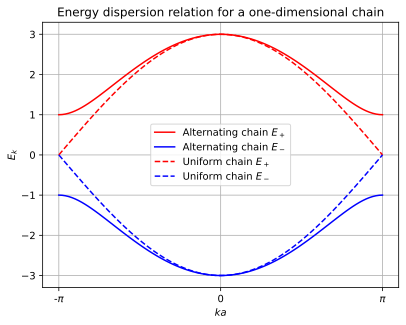

In [4]:
k = np.linspace(-np.pi, np.pi, 100)

# Calculate the band gap for the uniform chain
print("The band gap for alternating chain: ", 2 * energy(k[0], 1, 2))

# Plot the energy dispersion relation
plt.plot(k, energy(k, 1, 2), 'r')
plt.plot(k, -energy(k, 1, 2), 'b')
plt.plot(k, energy(k, 1.5, 1.5), 'r--')
plt.plot(k, -energy(k, 1.5, 1.5), 'b--')

# Add labels and title
plt.legend(['Alternating chain $E_+$', 'Alternating chain $E_-$', 'Uniform chain $E_+$', 'Uniform chain $E_-$'])
plt.xlabel('$ka$')
plt.ylabel('$E_k$')
plt.xticks([-np.pi, 0, np.pi], ['-$\pi$', '0', '$\pi$']) # Set the x-axis ticks
plt.title('Energy dispersion relation for a one-dimensional chain')
plt.grid()
plt.show()

The dispersion relations of the two energy bands of the chain are exactly symmetric under reflection in the $E = 0$ axis. 

## Semi-infinite Su-Schrieffer-Heeger (SSH) model
Suppose the $B$-site is on left edge, and the first hopping integral is denoted as $w$. We can write the Hamiltonian for the semi-infinite SSH chain as
$$
    \hat{H}_\text{alt}=-\sum_{n=0}\left[v(\ket{n,A}\bra{n,B}+\ket{n,B}\bra{n,A})+w(\ket{n,B}\bra{n+1,A}+\ket{n+1,A}\bra{n,B})\right].
$$
The eigenstate at energy $E$
$$
    \ket{\psi}=\sum_{n=0}(c_{n,A}\ket{n,A}+c_{n,B}\ket{n,B}),
$$
with $c_{0,A}=0$. 

### Finite chains

In [5]:
def altHamiltonian(num_sites, w, v):
    """
    This function calculates the Hamiltonian matrix for an alternating chain.

    Parameters:
    num_sites (int): The total number of sites in the chain.
    ratio (float): The ratio of intercell hopping to intracell hopping.

    Returns:
    numpy.ndarray: The Hamiltonian matrix for the alternating chain.
    """

    num_cells = int(num_sites / 2)  # Number of unit cells in the chain 

    # Construct the Hamiltonian matrix
    H = np.zeros((num_sites, num_sites))
    for j in range(num_cells):
        # Intercell hopping
        H[2*j, 2*j+1] = w
        H[2*j+1, 2*j] = w
        if j > 0:
            H[2*j-1, 2*j] = v
            H[2*j, 2*j-1] = v
    if num_sites%2 != 0:
        H[-2, -1] = v
        H[-1, -2] = v

    return H


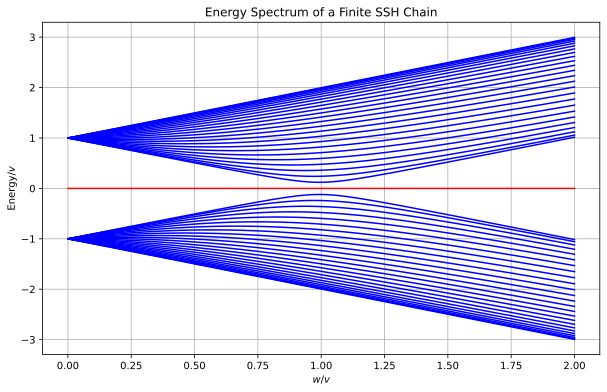

In [6]:
# Define parameters
num_sites = 51  # Total number of sites
v = 1.0  # Intracell hopping parameter 
w_list = np.linspace(0, 2, 100)  # Intracell hopping parameter 

# Initialize an array to store energy values for each w/v
energy_spectrum = np.zeros((len(w_list), num_sites))

for i, w in enumerate(w_list):
    eigenvalues, eigenvectors = np.linalg.eigh(altHamiltonian(num_sites, w, v))
    energy_spectrum[i, :] = eigenvalues

# Plot the energy spectrum vs. w/v
plt.figure(figsize=(10, 6))
for i in range(num_sites):
    if np.any(energy_spectrum[:, i] == 0):
        plt.plot(w_list/v, energy_spectrum[:, i]/v, color='red')
    else:
        plt.plot(w_list/v, energy_spectrum[:, i]/v, color='blue')

plt.xlabel('$w/v$')
plt.ylabel('Energy/$v$')
plt.title('Energy Spectrum of a Finite SSH Chain')
plt.grid(True)


### The probability distribution of the zero-energy state

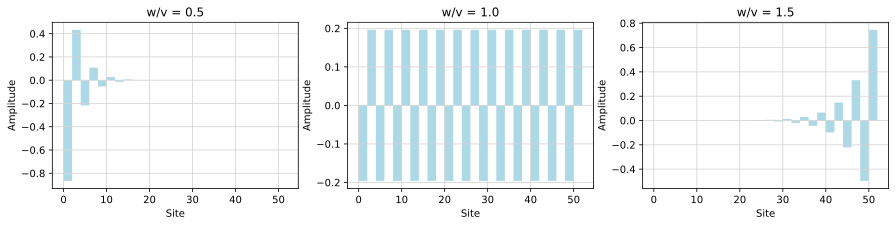

In [7]:
# Define parameters
v = 1.0
w_list = [0.5, 1, 1.5]  # w/v values

fig, axes = plt.subplots(1, 3, figsize=(15, 3))
# Plot the probability distribution of the zero-energy state
for w, ax in zip(w_list, axes):
    eigenvalues, eigenvectors = np.linalg.eigh(altHamiltonian(num_sites, w, v))  # Solve the eigenproblem

    zero_energy_index = np.argmin(np.abs(eigenvalues)) # Find the index of the zero-energy state
    zero_energy_eigenvector = eigenvectors[:, zero_energy_index] # Extract the zero-energy eigenvector

    # Plot the probability distribution of the zero-energy state
    ax.bar(range(1, num_sites+1), zero_energy_eigenvector, width=2, color='lightblue')
    ax.grid(True, color='lightgrey')
    ax.set_xlabel('Site') 
    ax.set_ylabel('Amplitude')  
    ax.set_title(f'w/v = {w/v}')